<style>
  .custom-title {
    font-size: 48px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }
</style>

<div class="custom-title">AWS Comprehend Short Demo</div>


<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Imports</span>
<p> boto3 : SDK for AWS Services</p>
<p>pandas : for data wrangling</p>
<p>matplotlib : visualization</p>

In [8]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt


<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Initialize Comprehend Client Connection</span>

<p>
The code creates an Amazon Comprehend client using boto3 in Python.
This client enables interaction with Amazon Comprehend's language processing API.
We define the service as "comprehend", and connect to the "us-east-1" server".
The comprehend object allows tasks like sentiment analysis and entity extraction.
</p>

In [9]:
comprehend = boto3.client(service_name='comprehend', region_name='us-east-1')

<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Individual testing</span>

<p>Let's take a look at what the API response is, to figure out how we will process it.</p>

In [10]:
text = "This is going to be AWSome!"
sentiment_output = comprehend.detect_sentiment(Text=text, LanguageCode='en')
display(sentiment_output)

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.6962903141975403,
  'Negative': 0.023476649075746536,
  'Neutral': 0.28005239367485046,
  'Mixed': 0.00018056397675536573},
 'ResponseMetadata': {'RequestId': 'e8d9f99e-70c3-4255-a69d-cf1ada5318f5',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'e8d9f99e-70c3-4255-a69d-cf1ada5318f5',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '165',
   'date': 'Mon, 28 Aug 2023 10:33:37 GMT'},
  'RetryAttempts': 0}}

In [11]:
text = "AWS Roadshow in Cebu is going to be Amazing!"
sentiment_output = comprehend.detect_sentiment(Text=text, LanguageCode='en')
display(sentiment_output)

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.9580084085464478,
  'Negative': 0.00037947349483147264,
  'Neutral': 0.041594117879867554,
  'Mixed': 1.7998210751102306e-05},
 'ResponseMetadata': {'RequestId': '4f493c6c-1daf-4b09-9b01-1f7e0e85a45e',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '4f493c6c-1daf-4b09-9b01-1f7e0e85a45e',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '167',
   'date': 'Mon, 28 Aug 2023 10:33:37 GMT'},
  'RetryAttempts': 0}}

<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Define function to apply to DF</span>

<p>To process many lines at once, we can .apply the API call to a column of text.</p>

In [12]:
def get_json(text: str):
    return comprehend.detect_sentiment(Text=text, LanguageCode='en')

<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Load data</span>

In [13]:
df = pd.read_csv("data/clean_hotel_data.csv")
display(df)

<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Apply</span>

In [14]:
df['sentiment_json'] = df['review'].apply(get_json)

In [16]:
# Save to avoid needing to call again, just in case
df.to_csv("data/unparsed_json.csv", index=False)

In [17]:
df

,review,rating,hotel,sentiment_json
0,A bit dear. Location was ideal as we were at...,8.7,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
1,Amount of free wi fi mean Why do guests have ...,7.1,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
2,The general breakfast hall was packed out I h...,8.1,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
3,Everything the hotel is in serious need of mo...,7.1,Hotel A,"{'Sentiment': 'NEGATIVE', 'SentimentScore': {'..."
4,No Negative. From the moment we walked into t...,8.7,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
...,...,...,...,...
995,No Negative. Breakfast very good location exc...,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
996,No Negative. Perfect,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
997,No Negative. Location,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."
998,No Negative. Location,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'..."


<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Parser for JSON Column</span>

<p>To do data wrangling and ultimately analyze the results, we need to parse the JSON column. We can do this using Python's indexing.</p>

In [18]:
def clean_json(json):
    sentiment_scores = json['SentimentScore']
    positive = sentiment_scores['Positive']
    negative = sentiment_scores['Negative']
    neutral = sentiment_scores['Neutral']
    mixed = sentiment_scores['Mixed']
    return positive, negative, neutral, mixed



In [20]:
df[['positive', 'negative', 'neutral', 'mixed']] = df['sentiment_json'].apply(clean_json).apply(pd.Series)

In [19]:
df

,review,rating,hotel,sentiment_json,positive,negative,neutral,mixed
0,A bit dear. Location was ideal as we were at...,8.7,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.983711,0.005218,0.009422,0.001649
1,Amount of free wi fi mean Why do guests have ...,7.1,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.550797,0.249413,0.168780,0.031010
2,The general breakfast hall was packed out I h...,8.1,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.997009,0.000138,0.002099,0.000754
3,Everything the hotel is in serious need of mo...,7.1,Hotel A,"{'Sentiment': 'NEGATIVE', 'SentimentScore': {'...",0.004503,0.963246,0.026421,0.005830
4,No Negative. From the moment we walked into t...,8.7,Hotel A,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.997741,0.000219,0.001974,0.000065
...,...,...,...,...,...,...,...,...
995,No Negative. Breakfast very good location exc...,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.999603,0.000034,0.000336,0.000028
996,No Negative. Perfect,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.998757,0.000562,0.000636,0.000046
997,No Negative. Location,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.827064,0.004002,0.168895,0.000039
998,No Negative. Location,8.7,Hotel E,"{'Sentiment': 'POSITIVE', 'SentimentScore': {'...",0.827064,0.004002,0.168895,0.000039


<style>
  .custom-title {
    font-size: 24px;
    font-weight: bold;
    color: #007acc; /* You can change the color to your preference */
    margin-bottom: 10px;
  }

  .custom-subsection {
    font-size: 18px;
    font-weight: bold;
    color: #009688; /* You can change the color to your preference */
    margin-top: 20px;
  }
</style>

## <span class="custom-subsection">Pandas, to work with Viz</span>

In [31]:
import pandas as pd

# Assuming you have your undersampled_df DataFrame with columns like 'hotel', 'positive', 'negative', 'neutral', 'mixed'

# Calculate the mean sentiment scores for each hotel
mean_sentiment_df = df.groupby('hotel')[['positive', 'negative', 'neutral', 'mixed']].mean().reset_index()

# Save the mean sentiment scores to a new CSV file
mean_sentiment_df


,hotel,positive,negative,neutral,mixed
0,Hotel A,0.472457,0.063002,0.034234,0.430308
1,Hotel B,0.933691,0.006538,0.024932,0.034839
2,Hotel C,0.851286,0.042454,0.048434,0.057826
3,Hotel D,0.223983,0.391595,0.067222,0.317201
4,Hotel E,0.895416,0.013405,0.088888,0.002290


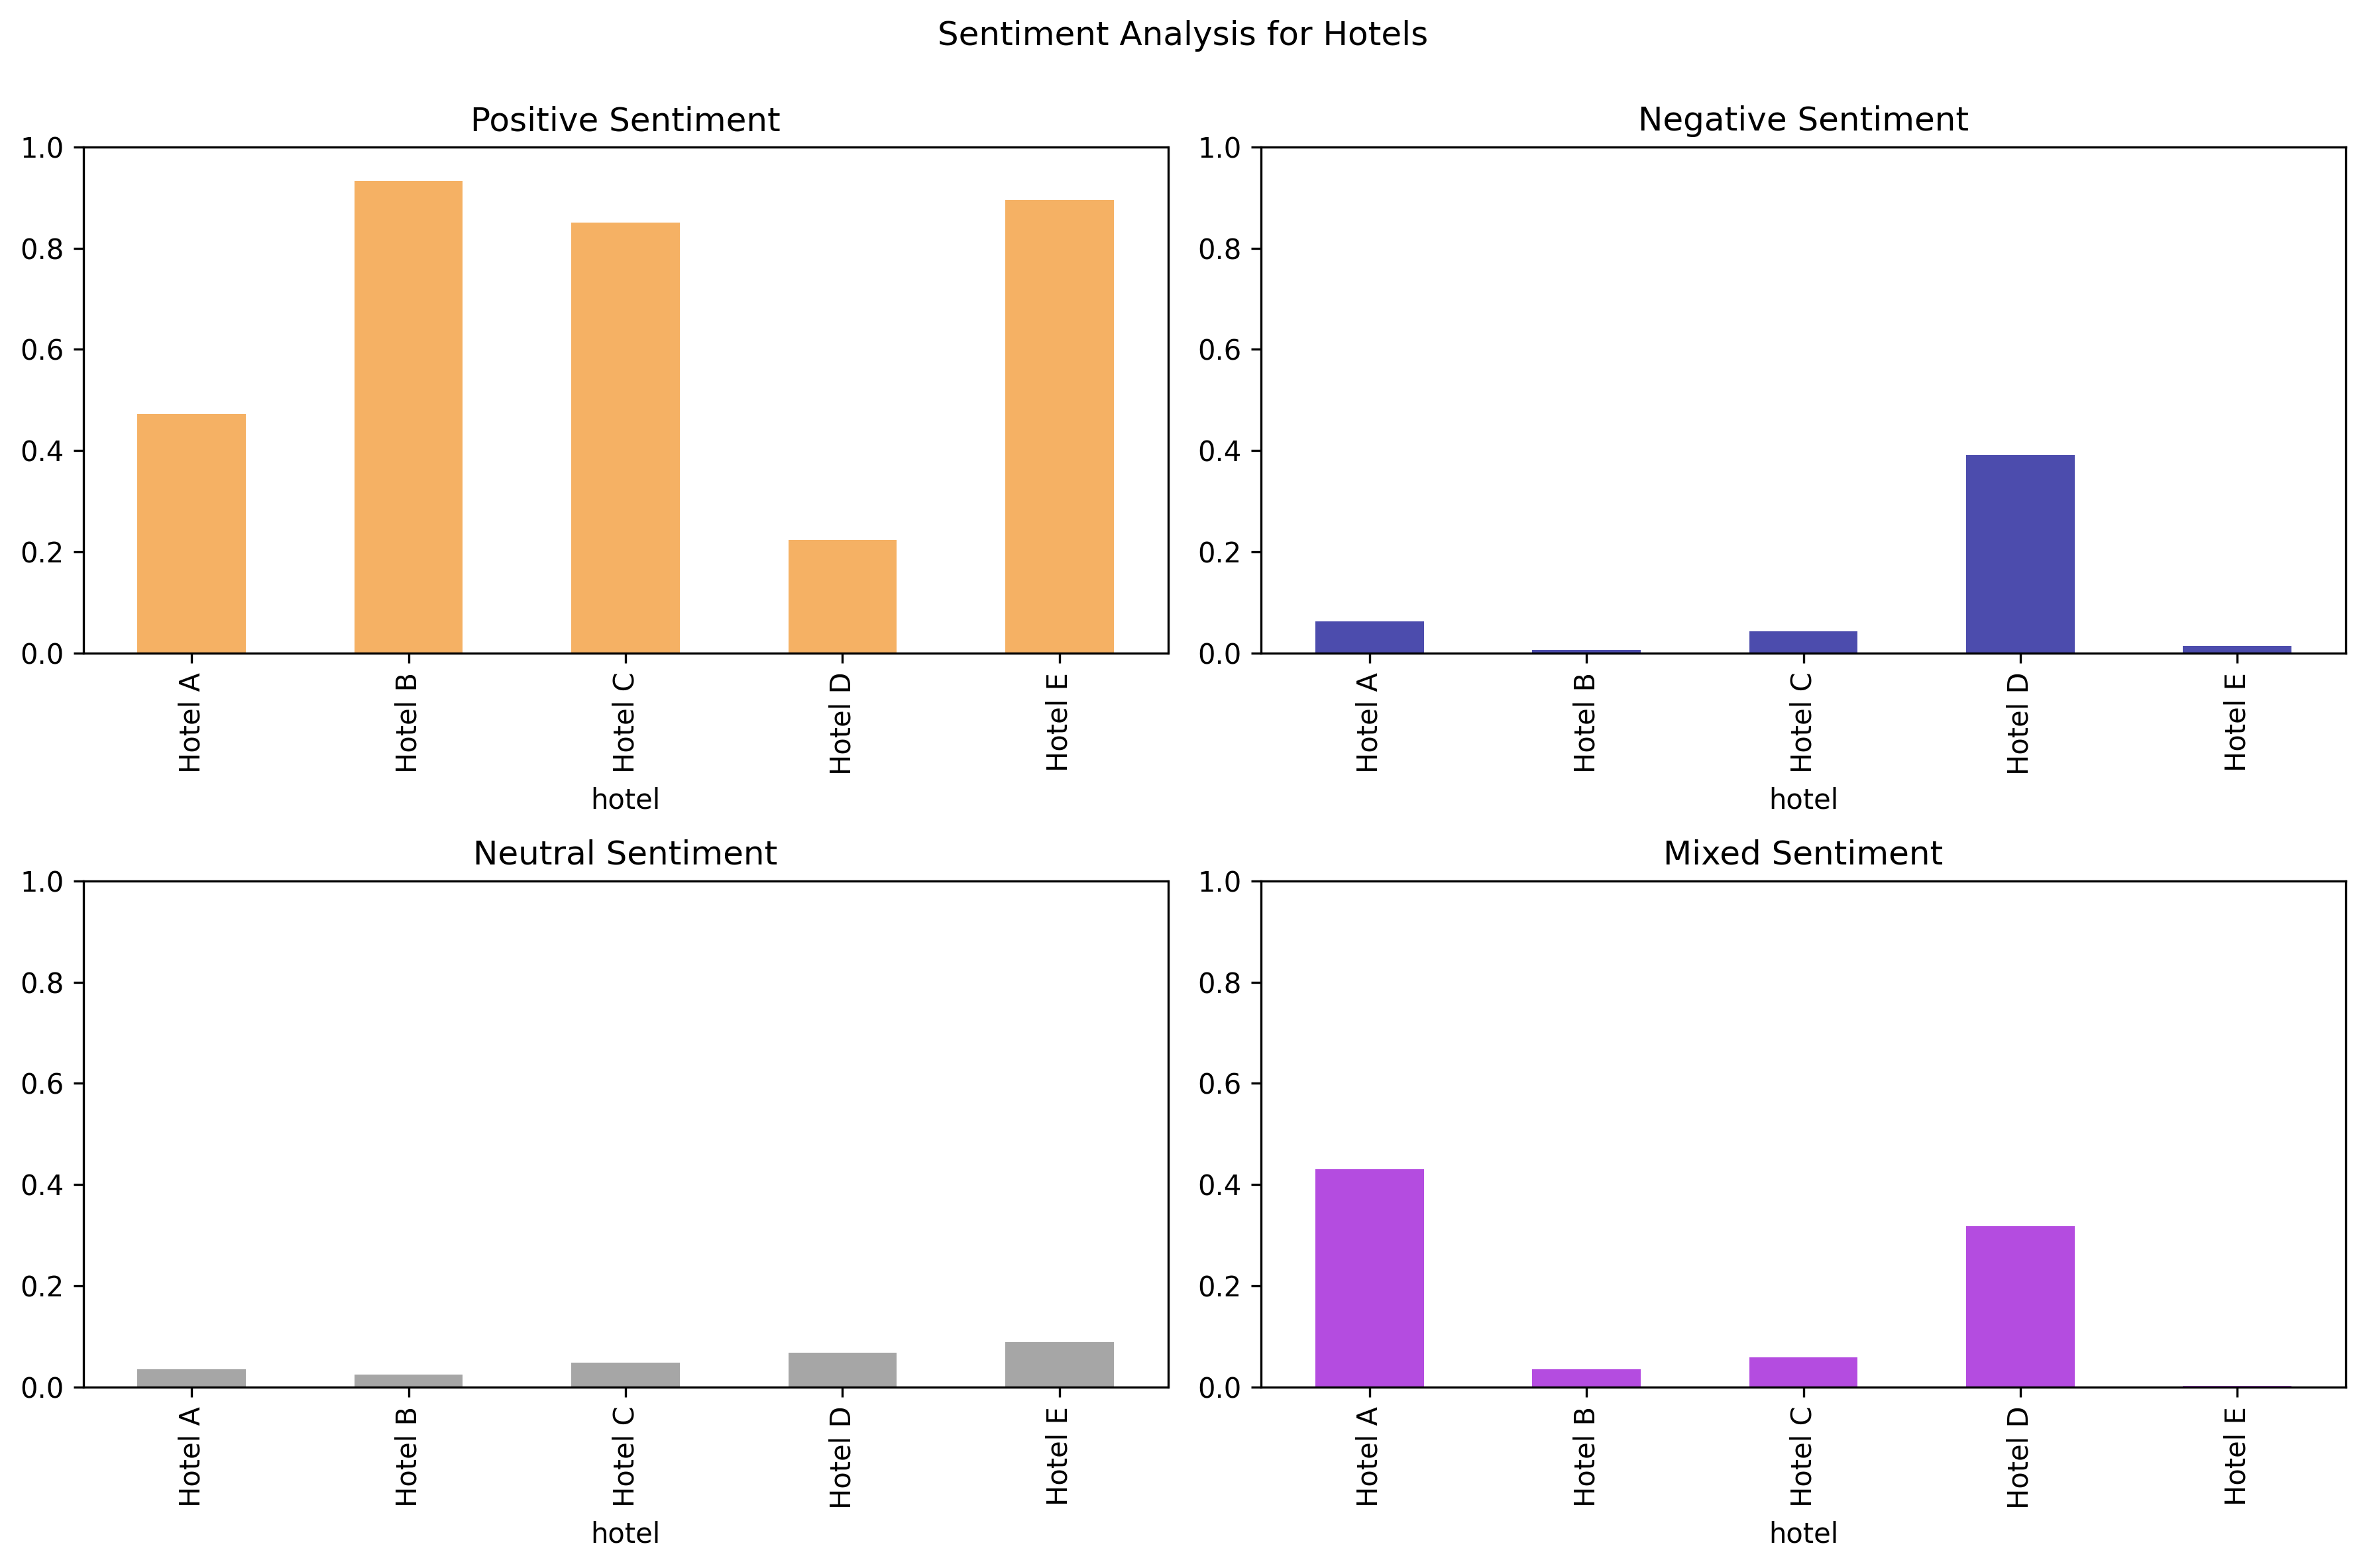

In [32]:
# Set the 'hotel' column as the index
mean_sentiment_df.set_index('hotel', inplace=True)

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), dpi=300)
fig.suptitle('Sentiment Analysis for Hotels')

# Bar plots for each sentiment column
df['positive'].plot(kind='bar', ax=axes[0, 0], color='#F29122', alpha=0.7)
axes[0, 0].set_title('Positive Sentiment')
axes[0, 0].set_ylim(0, 1)

df['negative'].plot(kind='bar', ax=axes[0, 1], color='darkblue', alpha=0.7)
axes[0, 1].set_title('Negative Sentiment')
axes[0, 1].set_ylim(0, 1)

df['neutral'].plot(kind='bar', ax=axes[1, 0], color='gray', alpha=0.7)
axes[1, 0].set_title('Neutral Sentiment')
axes[1, 0].set_ylim(0, 1)

df['mixed'].plot(kind='bar', ax=axes[1, 1], color='darkviolet', alpha=0.7)
axes[1, 1].set_title('Mixed Sentiment')
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()
